![image.png](python-ki.png)

# Webinar 3 - Løsning av likninger 
## Læringsmål

- Løse likninger med prøve og feile metoden
- Løse likninger med halveringsmetoden
- Løse likninger med andre metoder
- Løse likninger med Newtons metode



![image.png](blaa.png)

## Prøve og feile metoden

### Eksempel 1

Du setter 10 000 kroner inn på en bankkonto med 3% rente. Hvor mange år tar det før pengene har doblet seg? 

In [15]:
vekstfaktor = 1.03
beløp = 10000  # Startbeløpet

år = 0         # startåret

while beløp < 20000:
    beløp = beløp * vekstfaktor
    år = år + 1
    print(f"Etter {år:>2n} år: {beløp:>8.2f}")

Etter  1 år: 10300.00
Etter  2 år: 10609.00
Etter  3 år: 10927.27
Etter  4 år: 11255.09
Etter  5 år: 11592.74
Etter  6 år: 11940.52
Etter  7 år: 12298.74
Etter  8 år: 12667.70
Etter  9 år: 13047.73
Etter 10 år: 13439.16
Etter 11 år: 13842.34
Etter 12 år: 14257.61
Etter 13 år: 14685.34
Etter 14 år: 15125.90
Etter 15 år: 15579.67
Etter 16 år: 16047.06
Etter 17 år: 16528.48
Etter 18 år: 17024.33
Etter 19 år: 17535.06
Etter 20 år: 18061.11
Etter 21 år: 18602.95
Etter 22 år: 19161.03
Etter 23 år: 19735.87
Etter 24 år: 20327.94


### Eksempel 2 

Løs likningen $3000\cdot 1.018^x = 5000$

In [23]:
def f(x):
    return 3000 * 1.018**x

x = 1
while f(x) < 5000:
    x = x + 0.00001

print(f"{x:.6f}")

28.633860


In [19]:
0.1+0.1+0.1

0.30000000000000004

### Eksempel 3

Vi ønsker å finne alle nullpunktene til funksjonen 
$f(x)=e^x-x-\dfrac{3}{2}$. 

* Hvor mange nullpunkt kan funksjonen ha? 

* Hvilket intervall vil vi lete i? 

* Kan vi lage en algoritme som finner alle? 

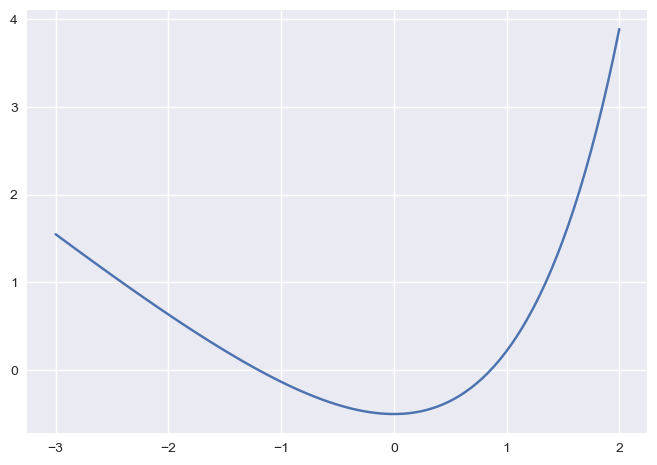

In [25]:
import numpy as np
import matplotlib.pyplot as plt 

X = np.linspace(-3, 2, 100)
def f(x):
    return np.exp(x)-x-3/2

plt.plot(X, f(X));


In [1]:
import ipywidgets as widgets 
from IPython.display import display
import numpy as np  #
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x)-x-3/2
plt.style.use("seaborn-v0_8")

@widgets.interact(d=(0, 2, 0.01), n=(0, 50, 1), x0=(-3, 2, 0.1))
def diskret(x0=-3, n=0, d=0.5):
    plt.figure(figsize=(12, 6))
    X = np.linspace(-3, 2.5, 100)
    plt.ylim(-1, 2)
    plt.plot(X, f(X))
    plt.hlines(0, -3, 2.5, color="black")
    if f(x0+n*d)>0:
        plt.scatter(x0+n*d, 0, color="g", s=100)
    else:
        plt.scatter(x0+n*d, 0, color="y", s=100)
    if f(x0+(n+1)*d)>0:
        plt.scatter(x0+(n+1)*d, 0, color="g", s=100)
    else:
        plt.scatter(x0+(n+1)*d, 0, color="y", s=100)
    plt.text(x0+n*d, -.23, r"$x_0$", fontdict={"fontsize": 20}, horizontalalignment="center")
    plt.text(x0+(n+1)*d, .14, r"$x_0+d$",
         fontdict={"fontsize": 20}, horizontalalignment="center")


interactive(children=(FloatSlider(value=-3.0, description='x0', max=2.0, min=-3.0), IntSlider(value=0, descrip…

In [34]:
import numpy as np

def f(x):
    return np.exp(x)-x-3/2

start = -2
slutt = 1

x = start        # Min startverdi 
d = 1E-6         # bredden på intervallene
teller = 0
while x + d < slutt:
    p = f(x)*f(x+d)
    if p <= 0:
        print(f"Det er et nullpunkt i x = {x+d/2:.6f}")
    x = x + d
    teller = teller + 1
print(teller)

Det er et nullpunkt i x = -1.198291
Det er et nullpunkt i x = 0.857676
3000000


![image.png](ki-1.png)

## Halveringsmetoden for å finne nullpunkt til en funksjon



In [2]:
import numpy as np
import matplotlib.pyplot as plt 


n = 11
A = [0]
B = [2]
M = [1]
@widgets.interact(steg=(0, 10, 1))
def halv(steg= 0):
    X = np.linspace(0, 2, 100)
    def f(x):
        return -2*x**3+6*x**2-5
    plt.figure(figsize=(12, 6))
    plt.plot(X, f(X))
    plt.hlines(0, 0, 2)
    plt.ylim(-6, 4)
    a = 0
    b = 2
    for i in range(n):
        m = (a+b)/2
        if f(a)*f(m)<0:
            b = m
        else:
            a = m
        A.append(a)
        B.append(b)
        M.append(m)
    for i in range(n+1):
        if i == steg:
            plt.scatter([A[steg], M[steg+1], B[steg]], [0,0,0])
            if f(A[steg])>=0:
                plt.plot([A[steg], A[steg]], [0, f(A[steg])], color="b")
            else:
                plt.plot([A[steg], A[steg]], [0, f(A[steg])], color="r")
            if f(B[steg])>=0:
                plt.plot([B[steg], B[steg]], [0, f(B[steg])], color="b")
            else:
                plt.plot([A[steg], A[steg]], [0, f(A[steg])], color="r")
            plt.text(A[steg], 0.2, "a", fontsize=16, horizontalalignment='center')
            plt.text(B[steg], 0.2, "b", fontsize=16, horizontalalignment='center')
            plt.text(M[steg+1], 0.2, "m", fontsize=16, horizontalalignment='center')
            plt.scatter(M[steg+1], 0, color="g", lw=4)


interactive(children=(IntSlider(value=0, description='steg', max=10), Output()), _dom_classes=('widget-interac…

> __Halveringsmetoden:__
>
>Vi ønsker å finne et nullpunkt til en funksjon $f$ i intervallet $[a , b]$.
>
>**Input:** Funksjonen $f$, tallene $a$, $b$ og antall ganger vi skal halvere $n$
>
>**Gjenta** $n$ ganger:
>
> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;$ m = \dfrac{a+b}{2}$
>
>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;**Hvis** $f(a)$ og $f(m)$ har ulikt fortegn, lar vi $b=m$
>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 
>
>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;**Ellers** lar vi $a = m $
>
>Da er $\dfrac{a+b}{2}$ en god tilnærming for et nullpunkt til $f$ i $[a , b]$.
>

### Eksempel 4

a) Begrunn at likningen $x^3+2x=1$ har én og bare én reell løsning. 

b) Lag et program som løser likningen ved å bruke halveringsmetoden.


In [37]:
def f(x):
    return x**3+2*x-1

# Startverdiene mine:
a = 0
b = 1

n = 20 

for i in range(n):
    m = (a+b)/2
    if f(a)*f(m)<0:
        b = m
    else:
        a = m
print((a+b)/2)

0.453397274017334


In [39]:
def Halvering(f, a, b, n=20):
    for i in range(n):
        m = (a+b)/2
        if f(a)*f(m)<0:
            b = m
        else:
            a = m
    return (a+b)/2

Halvering(f, 0, 1)

0.453397274017334

In [42]:
def f(x):
    return x**2-5

Halvering(f, -3, 0, 1000)

-2.23606797749979

In [43]:
np.sqrt(5)

2.23606797749979

Likningens reelle løsning er 

$$x={\frac{1}{3} \cdot \frac{{3\;{\kern 1pt} {{\sqrt[3]{{\frac{1}{{18}}\;{\kern 1pt} \left( {\sqrt {177}  + 9} \right)}}}^2} - 2}}{{\sqrt[3]{{\frac{1}{{18}}\;{\kern 1pt} \left( {\sqrt {177}  + 9} \right)}}}}}$$



## Ferdige funksjoner for å løse likninger

Det fins mange ferdige funksjoner for å løse likninger i Python. Noen av dem er:

- sympy
- numpy
- scipy
- fsolve
- bisection
- newton-raphson
- secant
- brentq
- ridder
- bisect
- newton
- fixed_point
- root_scalar
- root

### Eksempel 5

Løs likningen $x^3-2x^2=2x-4$ med sympy, numpy, scipy og fsolve.

In [44]:
import numpy as np

koeffisienter = [1, -2, -2, 4] # svarer til x^4-2x^2-2x+4 som jeg vil finne nullpkt til. 

løsninger = np.roots(koeffisienter)
løsninger

array([-1.41421356,  2.        ,  1.41421356])

In [50]:
from scipy.optimize import fsolve
import numpy as np

def f(x):
    return np.exp(x)-x-3/2

løsninger = fsolve(f, 1)
print(løsninger)


[0.85767667]


In [51]:
fsolve(f, -2)

array([-1.19829044])

In [52]:
from scipy.optimize import bisect

bisect(f, -1, 3)

0.8576766739442974

In [54]:
from scipy.optimize import root

def f(x):
    return x**3-2*x**2-11*x+11 

løsninger = root(f, -4, method='krylov')
print(løsninger)

 message: A solution was found at the specified tolerance.
 success: True
  status: 1
     fun: [-5.410e-07]
       x: -2.9637718140648195
     nit: 5


## Newtons metode

![image.png](newton.png)

![image.png](newton2.png)

Elevene kommer fram til følgende formel: 

$$ x_{n+1} =  \frac{x_n^2+5}{2x_n}$$

In [55]:
import ipywidgets as widgets 
import numpy as np  #
import matplotlib.pyplot as plt

def f(x):
    return x**3-5*x+3
def Df(x):
    return 3*x**2-5

@widgets.interact(n=(0, 9, 1))
def New(n=0):
    x0=3
    xmin=-0.5
    xmax=4
    ymin=-2
    ymax=16
    # Setter opp x-verdier
    X = np.linspace(xmin, xmax, 200)
    plt.figure(figsize=(12, 8))
    plt.plot(X, f(X)) # Plotter funksjonen
    plt.xlim(xmin, xmax) # Setter x-verdier
    plt.ylim(ymin, ymax) # Setter y-verdier
    plt.hlines(0, -4, 4, color="black") # Setter horisontal linje
    plt.vlines(0, -9, 20, color="black") # Setter vertikale linjer

    plt.scatter(x0, 0, color="g") # Plotterer punkt
    for i in range(10):
        if n > i:
            plt.plot([x0, x0], [0, f(x0)], "go-")
            plt.plot(X, (X-x0)*Df(x0)+f(x0), "crimson")
            x0 = x0 - f(x0)/(Df(x0))
    

interactive(children=(IntSlider(value=0, description='n', max=9), Output()), _dom_classes=('widget-interact',)…

> __Newtons metode__   
> 
> Gitt en deriverbar funksjon $f$. Velg en startverdi $x_0$ og la
>
> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;$  x_{n+1}= x_n-\dfrac{f(x_n)}{f'(x_n)}$
>
> For mange funksjoner vil da tallene $x_0, x_1, x_2, \ldots$ konvergere mot et nullpunkt til $f$.

###  Eksempel 5

Løs likningen $x^3-5x-1=0$ ved å bruke Newtons metode

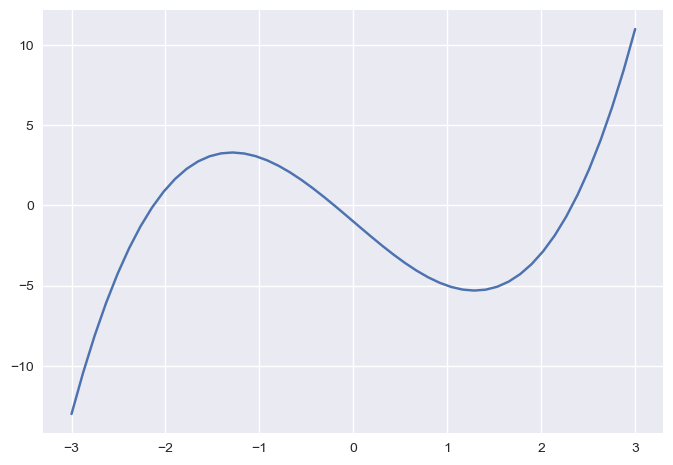

In [60]:
import numpy as np
import matplotlib.pyplot as plt 

def f(x):
    return x**3-5*x-1

def df(x):
    return 3*x**2-5

X = np.linspace(-3, 3)

plt.plot(X, f(X));


In [67]:
x = 0 # mitt startpunkt 
n = 10 # antall itterarsjoner 

for i in range(n):
    x = x - f(x)/df(x)
print(x)


-0.20163967572340463


In [72]:
def Newton(f, a=1, tol = 1E-12, maks=100, h = 0.00001):
    def df(x):
        return (f(x+h)-f(x))/h
    steg = 0
    b = a-f(a)/df(a)
    while abs(b-a)>tol:
        a = b
        b = a-f(a)/df(a)
        steg = steg + 1
        if steg > maks:
            break
    return a, steg

def f(x):
    return x**2-2

Newton(f, 2)

(1.4142135623730951, 5)

In [77]:
import numpy as np

def f(x):
    return np.exp(x)-x-3/2

Newton(f, 1)

(0.8576766739462162, 4)